# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import os

In [2]:
if not os.path.exists('lfw'):
    !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
    !unzip -o lfw.zip 
    !rm lfw.zip
    !rm -rf __MACOSX/

In [3]:
if not os.path.exists('dogImages'):
    !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
    !unzip -o dogImages.zip
    !rm dogImages.zip
    !rm -rf __MACOSX/

In [4]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [5]:
# check file directories
human_files[:3]

array(['lfw/Paulie_Ayala/Paulie_Ayala_0001.jpg',
       'lfw/Katie_Wagner/Katie_Wagner_0001.jpg',
       'lfw/Aaron_Pena/Aaron_Pena_0001.jpg'], dtype='<U84')

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [6]:
!pip install opencv-python

fastai 1.0.50.post1 requires nvidia-ml-py3, which is not installed.
thinc 6.12.1 has requirement msgpack<0.6.0,>=0.5.6, but you'll have msgpack 0.6.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Number of faces detected: 1


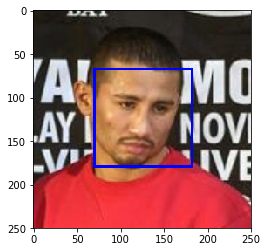

In [7]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [8]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

- 99.0 percent of images in `human_files_short` have a human.
- 9.0 percent of images in `dog_files_short` have a human.

In [9]:
from tqdm import trange

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

h_counter = 0
d_counter = 0

assert(len(human_files_short) == len(dog_files_short))

idx_len = len(human_files_short)

for i in trange(idx_len):
    h_pic = human_files_short[i]
    d_pic = dog_files_short[i]
    
    if face_detector(h_pic):
        h_counter += 1
    if face_detector(d_pic):
        d_counter +=1

print('detect human in human_files: {acc}%'.format(acc=100*h_counter/100))
print('detect human in dog_files: {acc}%'.format(acc=100*d_counter/100))

100%|██████████| 100/100 [00:23<00:00,  4.45it/s]

detect human in human_files: 99.0%
detect human in dog_files: 9.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [11]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [12]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [13]:
test_img = Image.open(human_files[0])
test_img

In [14]:
# check img size
test_img.size

(250, 250)

In [15]:
# crop an image and transform as a Tansor & set value in range [0,1]
data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])

test_img_tensor = data_transform(test_img)

# check image tensor shape
test_img_tensor.shape # (num_channels, H, W)

torch.Size([3, 224, 224])

In [16]:
test_img_tensor.unsqueeze(0).shape # (input_img_num, num_channels, H, W)

torch.Size([1, 3, 224, 224])

In [17]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    image = Image.open(img_path)
    
    # H and W are expected to be at least 224 -> resize
    # convert image to tensor
    # images have to be loaded in to a range of [0, 1] -> use mean & std from PyTorch Docu.
    data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])
    
    image_tensor = data_transform(image) # (num_channels, H, W)
    
    # unsqueeze: insert a new axis stands for num_input_images
    image_tensor = image_tensor.unsqueeze(0) 
    
    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    image_var = torch.autograd.Variable(image_tensor) ###
    
    prediction = VGG16(image_var) # (batch, num class labels) ###
    prediction = prediction.data.argmax()
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [18]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred_index = VGG16_predict(img_path)
    
    if pred_index >= 151 and pred_index <= 268:
        result = True
    else:
        result = False
    
    return result # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

- 0.0 percent of images in `human_files_short` have a dog.
- 95.0 percent of images in `dog_files_short` have a dog.

In [19]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
h_counter = 0
d_counter = 0

for i in trange(100):
    h_pic = human_files_short[i]
    d_pic = dog_files_short[i]
    
    if dog_detector(h_pic):
        h_counter += 1
    if dog_detector(d_pic):
        d_counter +=1

print('detect dog in human_files: {acc}%'.format(acc=100*h_counter/100))
print('detect dog in dog_files: {acc}%'.format(acc=100*d_counter/100))

100%|██████████| 100/100 [00:07<00:00, 13.95it/s]

detect dog in human_files: 1.0%
detect dog in dog_files: 94.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [20]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [21]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

In [22]:
# set transforms data for train, val, and test

transforms = {
    'train' : transforms.Compose([transforms.Resize(256), # resize as 256x256
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(), # augmentation purpose...
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'valid' : transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'test' : transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])
}

In [23]:
image_datasets = {
    x: datasets.ImageFolder(
        os.path.join('./dogImages', x), 
        transforms[x])
    for x in ['train', 'valid', 'test']
}

In [24]:
batch_size = 32

loaders_scratch = {
    x: torch.utils.data.DataLoader(
        dataset=image_datasets[x],
        batch_size=batch_size,
        shuffle=True
    ) for x in ['train', 'valid', 'test']
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- I resize images and crop. 
    - `transforms.Resize(256)`
    - `transforms.RandomResizedCrop(224)`
    - And according to [torchvision.model documentation](https://pytorch.org/docs/master/torchvision/models.html), all pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where **H and W are expected to be at least 224**. Based on this, I constructed the input tensor with 224 size.


    
- I used augmentation only in training dataset.
    - `transforms.RandomHorizontalFlip()`

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [25]:
# check VGG16 model structure
VGG16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [26]:
# check training dataset's label number
len(image_datasets['train'].classes)

133

In [27]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## CNN
        
        # Size: 224
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        # Size: 224/2(by pooling) = 112
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        # Size: 112/2(by pooling) =  56
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        # Size: 56/2(by pooling) =  28
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        # Size: 28/2(by pooling) =  14
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        # Size: 14/2(by pooling) =  7
        self.fc1 = nn.Linear(512 * 7 * 7, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 133) # 133 = len(image_datasets['train'].classes)
        
        # Batch Normalization -> for faster & stable training
        self.batch_norm64 = nn.BatchNorm2d(64)
        self.batch_norm128 = nn.BatchNorm2d(128)
        self.batch_norm256 = nn.BatchNorm2d(256)
        self.batch_norm512 = nn.BatchNorm2d(512)
        
        # Pooling
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Activation
        self.relu = nn.ReLU(inplace=True)
        
        # Dropout
        self.dropout = nn.Dropout()
    
    def forward(self, x):
        # cnn 1-n
        x = self.relu(self.batch_norm64(self.conv1_1(x)))
        x = self.relu(self.batch_norm64(self.conv1_2(x)))
        x = self.max_pool(x)
        
        # cnn 2-n
        x = self.relu(self.batch_norm128(self.conv2_1(x)))
        x = self.relu(self.batch_norm128(self.conv2_2(x)))
        x = self.max_pool(x)
        
        # cnn 3-n
        x = self.relu(self.batch_norm256(self.conv3_1(x)))
        x = self.relu(self.batch_norm256(self.conv3_2(x)))
        x = self.relu(self.batch_norm256(self.conv3_3(x)))
        x = self.max_pool(x)
        
        # cnn 4-n
        x = self.relu(self.batch_norm512(self.conv4_1(x)))
        x = self.relu(self.batch_norm512(self.conv4_2(x)))
        x = self.relu(self.batch_norm512(self.conv4_3(x)))
        x = self.max_pool(x)
        
        # cnn 5-n
        x = self.relu(self.batch_norm512(self.conv5_1(x)))
        x = self.relu(self.batch_norm512(self.conv5_2(x)))
        x = self.relu(self.batch_norm512(self.conv5_3(x)))
        x = self.max_pool(x)
        
        # reshape
        x = x.view(x.size(0), -1)
        
        # fc1
        x = self.dropout(self.relu(self.fc1(x)))
        # fc2
        x = self.dropout(self.relu(self.fc2(x)))
        # fc3
        x = self.fc3(x)

        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Outline:

- In `Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)`, I need to show the effect of **Transfer Learning**. 
- For that reason, I tried to imitate one of the pre-trained model from `torchvision.models`.
- Using the same architecture(VGG-16) in both experiments(Step 3 & 4), I could strictly control other conditions except using **Transfer Learning**.
    
    
    

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [28]:
import torch.optim as optim

"""Reference: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html"""

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=1e-3, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [29]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        start_time = time.time() 
        
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate batch loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # parameter update
            optimizer.step()
            # update training loss
            train_loss += loss.item() * data.size(0)
            
        ######################    
        # validate the model #
        ######################
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass
            output = model(data)
            # batch loss
            loss = criterion(output, target)
            # update validation loss
            valid_loss += loss.item() * data.size(0)
        
        # calculate average losses
        train_loss = train_loss / len(loaders['train'].dataset)
        valid_loss = valid_loss / len(loaders['valid'].dataset)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('we have got a better result = better validation loss ({:.6f} -> {:.6f}) => model saved.'.
                 format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
        time_took = time.time() - start_time
        min_took = time_took // 60
        sec_took = time_took % 60
        print("--- {} time it: {} minutes {} seconds ---".format(time.asctime(time.localtime(time.time())), 
                                                                 min_took, sec_took))
            
    # return trained model
    return model

In [30]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [33]:
# train the model
n_epochs = 10 # 4th time of 10-epochs-training step.

model_scratch = train(
    n_epochs=n_epochs,
    loaders=loaders_scratch,
    model=model_scratch,
    optimizer=optimizer_scratch,
    criterion=criterion_scratch,
    use_cuda=use_cuda,
    save_path='model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.873514 	Validation Loss: 4.779828
we have got a better result = better validation loss (inf -> 4.779828) => model saved.
--- Fri Apr 19 23:51:23 2019 time it: 7.0 minutes 44.152488470077515 seconds ---
Epoch: 2 	Training Loss: 4.730233 	Validation Loss: 4.515178
we have got a better result = better validation loss (4.779828 -> 4.515178) => model saved.
--- Fri Apr 19 23:59:08 2019 time it: 7.0 minutes 44.51783323287964 seconds ---
Epoch: 3 	Training Loss: 4.474691 	Validation Loss: 4.116943
we have got a better result = better validation loss (4.515178 -> 4.116943) => model saved.
--- Sat Apr 20 00:06:54 2019 time it: 7.0 minutes 46.138689041137695 seconds ---
Epoch: 4 	Training Loss: 4.026454 	Validation Loss: 3.929829
we have got a better result = better validation loss (4.116943 -> 3.929829) => model saved.
--- Sat Apr 20 00:14:39 2019 time it: 7.0 minutes 45.649739027023315 seconds ---
Epoch: 5 	Training Loss: 3.506978 	Validation Loss: 3.316701
we have g

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [34]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [35]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.382713


Test Accuracy: 35% (297/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [36]:
## TODO: Specify data loaders
# use same data loaders above...
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [37]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

## Load pre-trained VGG-16 ##

# Load the pre-trained model
model_transfer = models.vgg16(pretrained=True)

# Freeze the pre-trained weights
for param in model_transfer.features.parameters():
    param.required_grad = False
    
# Print the model's architecture
print(model_transfer.eval())

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [38]:
## Change the last layer of pre-traind VGG-16 with new one.
new_layer = nn.Linear(model_transfer.classifier[-1].in_features, 133)
model_transfer.classifier[-1] = new_layer


if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

To show the effect of **Transfer Learning**, I think I should experiment with VGG-16 architecture since I tried to imitate VGG-16 in step `Step 3: Create a CNN to Classify Dog Breeds (from Scratch)`.

It can be said that the results of this experiment were due to **Transfer Learning**, as long as other conditions are strictly  controled.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [39]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=1e-4, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [40]:
# train the model
n_epochs = 10
model_transfer = train(
    n_epochs=n_epochs,
    loaders=loaders_scratch,
    model=model_transfer,
    optimizer=optimizer_transfer,
    criterion=criterion_transfer,
    use_cuda=use_cuda,
    save_path='model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.486842 	Validation Loss: 3.635737
we have got a better result = better validation loss (inf -> 3.635737) => model saved.
--- Sat Apr 20 01:19:18 2019 time it: 7.0 minutes 35.05389046669006 seconds ---
Epoch: 2 	Training Loss: 3.329802 	Validation Loss: 2.132560
we have got a better result = better validation loss (3.635737 -> 2.132560) => model saved.
--- Sat Apr 20 01:26:54 2019 time it: 7.0 minutes 36.16894555091858 seconds ---
Epoch: 3 	Training Loss: 2.223248 	Validation Loss: 1.189543
we have got a better result = better validation loss (2.132560 -> 1.189543) => model saved.
--- Sat Apr 20 01:34:30 2019 time it: 7.0 minutes 36.062983989715576 seconds ---
Epoch: 4 	Training Loss: 1.597438 	Validation Loss: 0.803277
we have got a better result = better validation loss (1.189543 -> 0.803277) => model saved.
--- Sat Apr 20 01:42:07 2019 time it: 7.0 minutes 36.71251678466797 seconds ---
Epoch: 5 	Training Loss: 1.295175 	Validation Loss: 0.639646
we have got

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [41]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.448969


Test Accuracy: 86% (719/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [65]:
import torchvision.transforms as transforms

### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

# set device
device = torch.device("cuda:0" if use_cuda else "cpu")

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]
    idx_with_class_names = image_datasets['train'].classes
    
    img = Image.open(img_path)
    transform_img = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
    img_tensor = transform_img(img)
    img_tensor = img_tensor.unsqueeze_(0) # in-place version.
    img_tensor = img_tensor.to(device)
    
    img_var = torch.autograd.Variable(img_tensor)
    
    output = model_transfer(img_var)
    softmax = nn.Softmax(dim=1)
    preds = softmax(output)
    
    top_preds = torch.topk(preds, 3)
    
    labels = [class_names[i] for i in top_preds[1][0]]
    idx_with_labels = [idx_with_class_names[i] for i in top_preds[1][0]]
    
    probs = top_preds[0][0]
    
    return labels, probs, idx_with_labels

In [66]:
# load the trained model
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu')) # map_location???

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [76]:
import random

def display_image(img_path):
    # Display image
    _, ax = plt.subplots()
    ax.imshow(Image.open(img_path))
    plt.axis('off')
    plt.show()
    
    
def display_dog_breeds(labels):
    fig = plt.figure(figsize=(16,4))
    for i, label in enumerate(labels):
        subdir = ''.join(['dogImages/train/', label + '/'])
        file = random.choice(os.listdir(subdir))
        img_path = ''.join([subdir, file])
        ax = fig.add_subplot(1,3,i+1)
        ax.imshow(Image.open(img_path), cmap="gray", interpolation='nearest')
        plt.title(label.split('.')[1])
        plt.axis('off')
    plt.show()

In [77]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    labels, probs, pred_idx_with_label = predict_breed_transfer(img_path)
    
    if probs[0] > 0.35:
        print("Dog detected!")
        display_image(img_path)
        
        print("Predicted breeds:")
        sentence = ""
        for pred_label, prob in zip(labels, probs):
            print(pred_label, end=': ')
            print('{:.2f}%'.format(100*prob))
        print('\n')
        
        display_dog_breeds(pred_idx_with_label)
        
    elif face_detector(img_path):
        print("Human detected!")
        display_image(img_path)
        
        print("Most resembled breeds:")
        for pred_label, prob in zip(labels, probs):
            print(pred_label, end=': ')
            print('{:.2f}%'.format(100*prob))
        print('\n')
        
        display_dog_breeds(pred_idx_with_label)
    
    else:
        # Display the input image
        print("Cannot detect dog nor human!")
        display_image(img_path)
        print('\n')
    
    print('-------------\n')
        

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In most cases, it showed satisfactory performance.
However, the following improvements are suggested for higher performance.


1. Better pre-trained model  
    - Use better pre-trained model such as a model has **Residual Networks**.
    - Ref: ["Deep Residual Learning for Image Recognition"](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf)
  
  
2. Try to use other activation function.
    - Ref: ["Gaussian Error Linear Units (GELUs)"](https://arxiv.org/abs/1606.08415)


3. Try to use new architecture like Attention.
    - In the case of a picture in which a person and a dog appear at the same time, **Attention** can be used to make more accurate detection.
    - Ref: ["Show, Attend and Tell: Neural Image Caption Generation with Visual Attention"](https://arxiv.org/pdf/1502.03044.pdf)

Human detected!


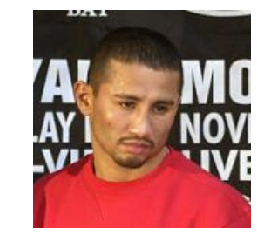

Most resembled breeds:
Ibizan hound: 3.05%
American staffordshire terrier: 2.33%
Chinese crested: 2.23%




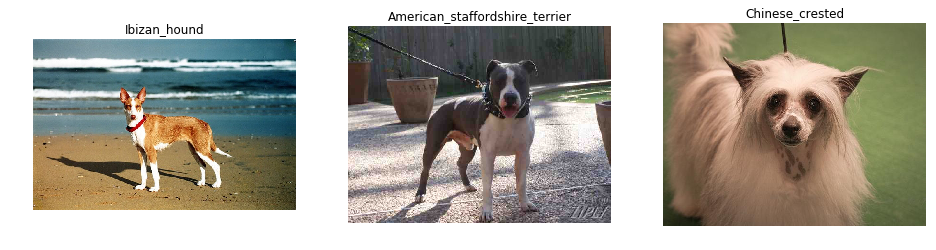

-------------

Human detected!


Most resembled breeds:
Chinese crested: 3.04%
Briard: 2.55%
Poodle: 2.27%




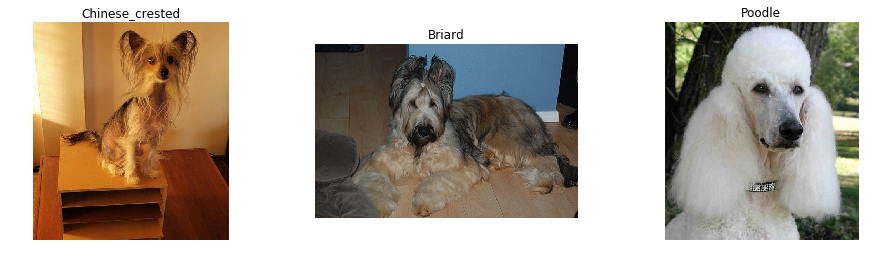

-------------

Human detected!


Most resembled breeds:
Poodle: 3.23%
Dachshund: 2.66%
Dogue de bordeaux: 2.15%




-------------

Human detected!


Most resembled breeds:
American staffordshire terrier: 2.60%
German wirehaired pointer: 1.85%
Portuguese water dog: 1.81%




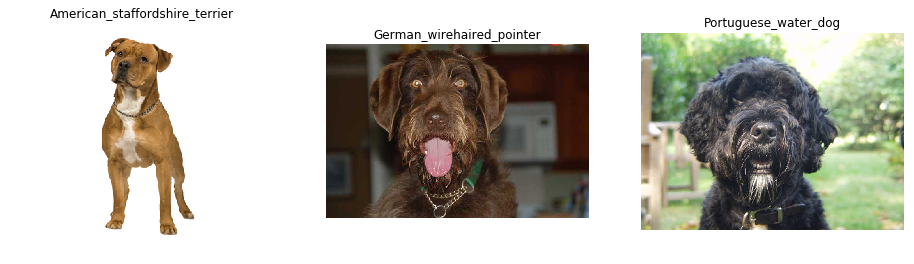

-------------

Human detected!


Most resembled breeds:
Icelandic sheepdog: 1.88%
Welsh springer spaniel: 1.85%
Chinese crested: 1.83%




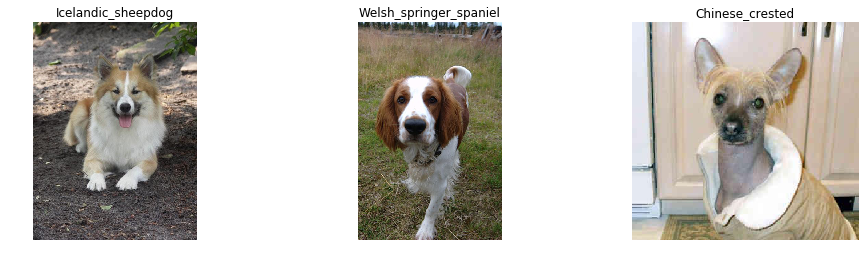

-------------

Cannot detect dog nor human!


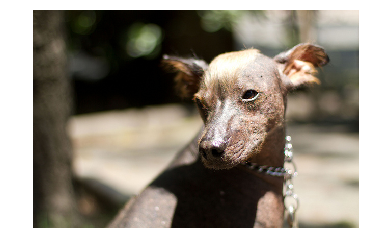



-------------

Dog detected!


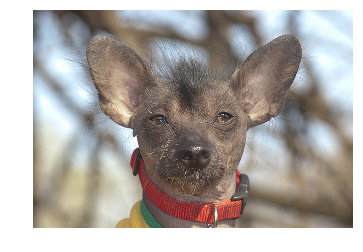

Predicted breeds:
Xoloitzcuintli: 76.97%
Chihuahua: 15.91%
French bulldog: 3.50%




-------------

Dog detected!


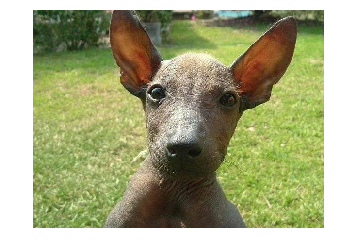

Predicted breeds:
Xoloitzcuintli: 99.90%
Manchester terrier: 0.02%
Greyhound: 0.02%




-------------

Dog detected!


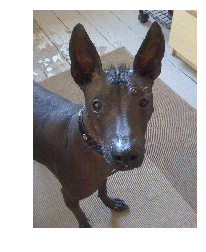

Predicted breeds:
Xoloitzcuintli: 99.33%
Manchester terrier: 0.55%
Pharaoh hound: 0.03%




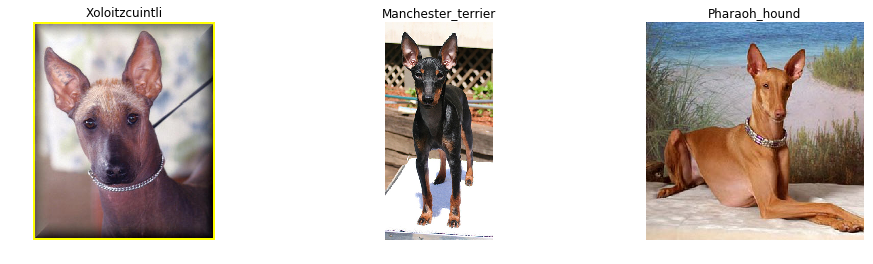

-------------

Dog detected!


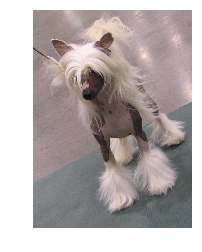

Predicted breeds:
Chinese crested: 97.36%
Maltese: 0.95%
Afghan hound: 0.45%




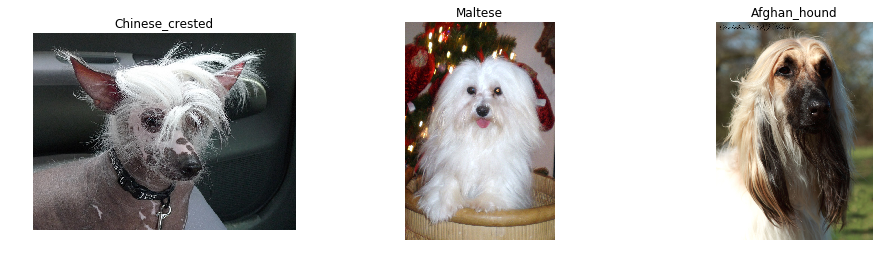

-------------



In [78]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:5], dog_files[:5])):
    run_app(file)